In [96]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import random
from sys import argv


In [234]:
def get_obs_ranges(block_width, block_height, blocks,spacer):
    obs_x = []
    obs_y = []
    for x in range(blocks[1]):
        start = block_width*x + spacer*x
        end = start + block_width
        obs_x.append((start,end))
    for y in range(blocks[0]):
        start = block_height*y + spacer*y
        end = start + block_height
        obs_y.append((start,end))
    return [obs_x,obs_y]

def get_obs_coordinates(x_ranges, y_ranges,spacer):
    obs = []
    free_space_ranges_x = set()
    free_space_ranges_y = set()
    for x_range in x_ranges:
        free_space_ranges_x.add((int(x_range[1])+1, int(x_range[1])+spacer-1 ))
        for y_range in y_ranges:
            free_space_ranges_y.add((int(y_range[1])+1, int(y_range[1])+spacer-1 ))
            for x in range(int(x_range[0]), 1+int(x_range[1]) ):
                obs.append((x,int(y_range[0])))
                obs.append((x,int(y_range[1])))
            for y in range(int(y_range[0]), int(y_range[1]) ):
                obs.append((int(x_range[0]),y))
                obs.append((int(x_range[1]),y))
    free_space_ranges_x.remove((int(x_ranges[-1][1]+1), int(x_ranges[-1][1])+spacer-1))
    free_space_ranges_y.remove((int(y_ranges[-1][1])+1, int(y_ranges[-1][1])+spacer-1 ))
    return [obs,free_space_ranges_x,free_space_ranges_y]

def get_streets_intersections(free_space_ranges_x,free_space_ranges_y,block_height,block_width):
    streets = set()
    intersections = set()
    for x in free_space_ranges_x:
        for y in free_space_ranges_y:
            street_bottom = (y[0]-block_height-1,y[0]-1)
            street_top = (y[1]+1,y[1]+block_height+1)
            
            street_left = (x[0]-block_width-1,x[0]-1)
            street_right = (x[1]+1,x[1]+block_width+1)
            
            
            intersections.add((x,y))
            streets.add((x,street_bottom))
            streets.add((x,street_top))
            streets.add((street_right,y))
            streets.add((street_left,y))
    return [streets, intersections]

def get_start_end_points(free_space_ranges_x,rows):
    x_range1 = random.choice(tuple(free_space_ranges_x))
    free_space_ranges_x.remove(x_range1)
    x_range1 = np.arange(x_range1[0],x_range1[1])
    
    x_range2 = random.choice(tuple(free_space_ranges_x))
    x_range2 = np.arange(x_range2[0],x_range2[1])
    
    y_range = np.arange(1,rows)
    
    x_start = random.choice(x_range1)
    y_start = random.choice(y_range)
    
    x_end = random.choice(x_range2)
    y_end = random.choice(y_range)
    return [(x_start,y_start),(x_end,y_end)]
       
def map_generate(rows,cols,blocks,spacer):
    col_space = cols - (blocks[1]-1)*spacer
    row_space = rows - (blocks[0]-1)*spacer
    block_width = col_space/blocks[1]
    block_height = row_space/blocks[0]
    x_ranges, y_ranges = get_obs_ranges(block_width,block_height,blocks,spacer)
    obs, free_space_ranges_x,free_space_ranges_y = get_obs_coordinates(x_ranges, y_ranges,spacer)
    streets,intersections = get_streets_intersections(free_space_ranges_x,free_space_ranges_y,int(block_height),int(block_width))
    start,end = get_start_end_points(free_space_ranges_x,rows)
    return [obs,start,end,streets,intersections]



{((8, 13), (36, 41)), ((22, 27), (36, 41)), ((36, 41), (8, 13)), ((36, 41), (22, 27)), ((22, 27), (22, 27)), ((36, 41), (36, 41)), ((22, 27), (8, 13)), ((8, 13), (8, 13)), ((8, 13), (22, 27))} {((0, 7), (8, 13)), ((36, 41), (42, 49)), ((14, 21), (36, 41)), ((8, 13), (14, 21)), ((42, 49), (8, 13)), ((22, 27), (28, 35)), ((36, 41), (0, 7)), ((0, 7), (22, 27)), ((28, 35), (8, 13)), ((8, 13), (28, 35)), ((42, 49), (22, 27)), ((22, 27), (42, 49)), ((14, 21), (8, 13)), ((28, 35), (22, 27)), ((36, 41), (14, 21)), ((0, 7), (36, 41)), ((22, 27), (0, 7)), ((8, 13), (42, 49)), ((42, 49), (36, 41)), ((14, 21), (22, 27)), ((36, 41), (28, 35)), ((28, 35), (36, 41)), ((8, 13), (0, 7)), ((22, 27), (14, 21))}


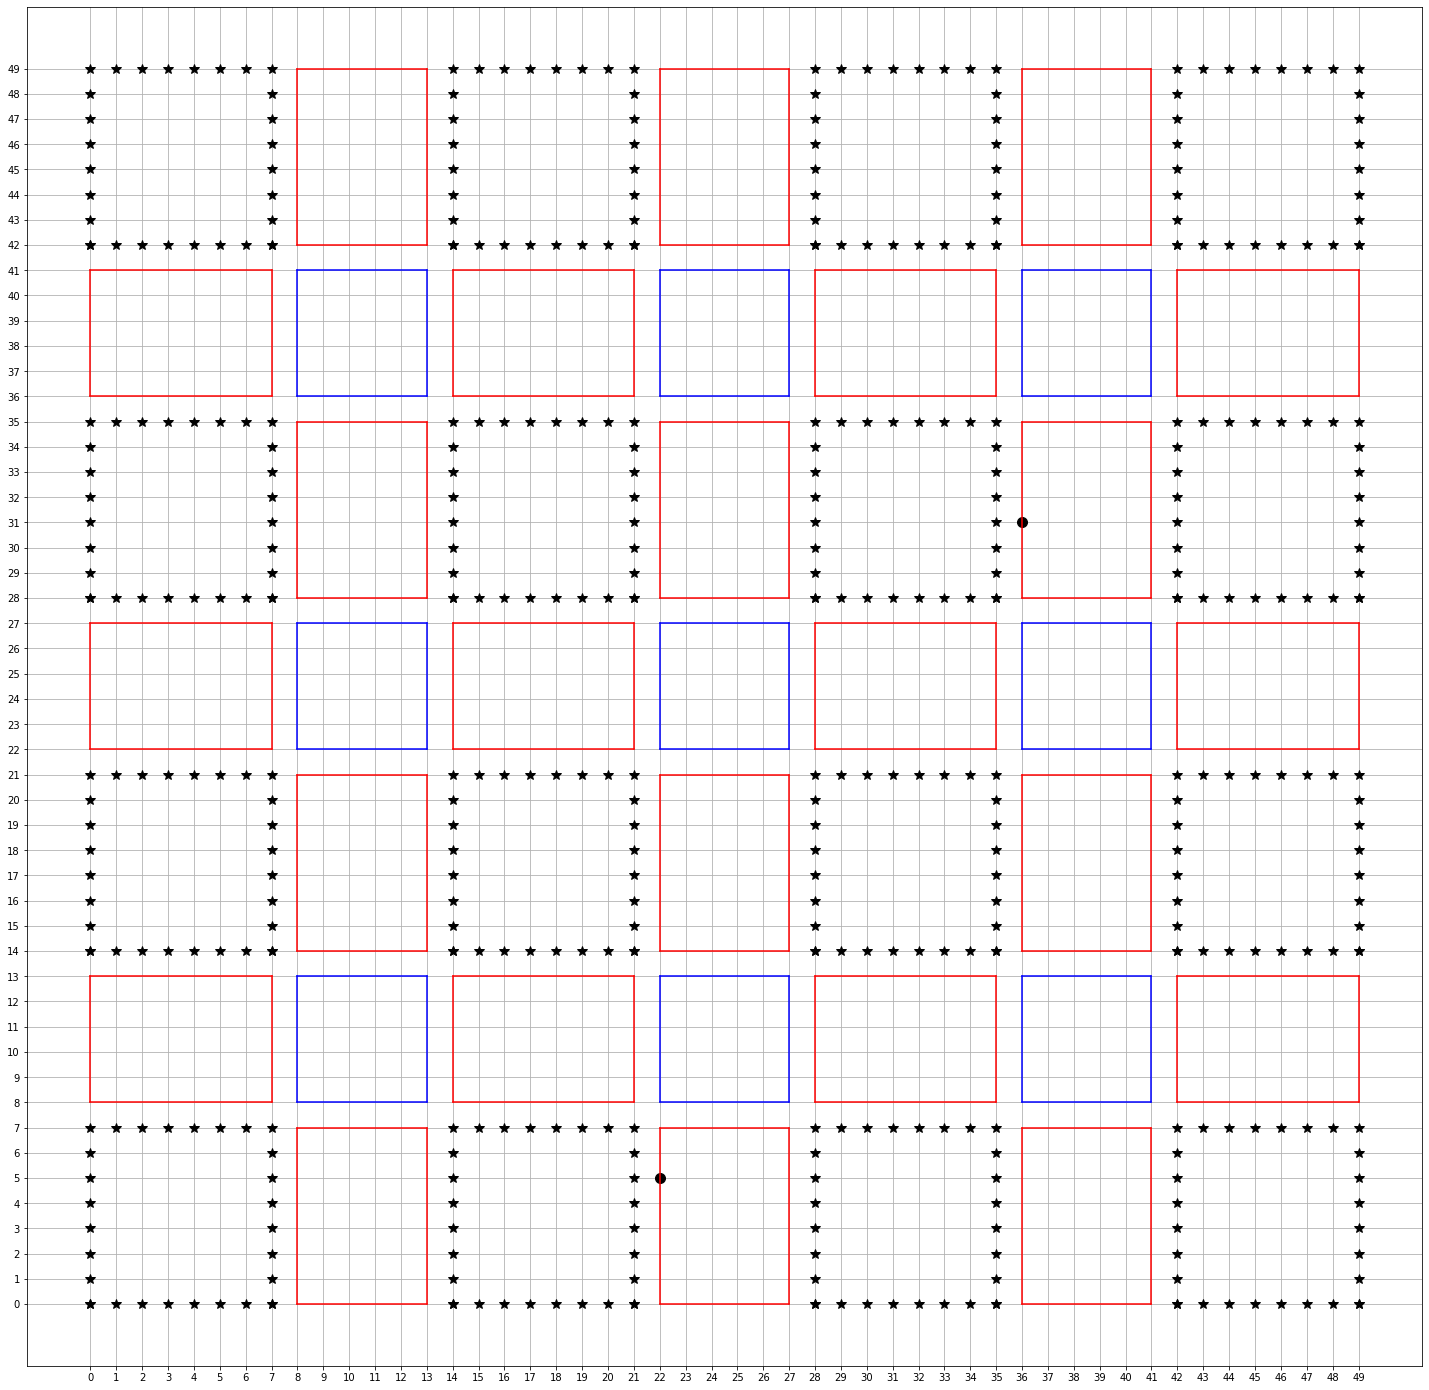

In [235]:
rows = 50
cols = 50
m,start,end,streets,intersections = map_generate(rows-1,cols-1,[4,4],7)
print(intersections,streets)
obs_x = [cell[0] for cell in m]
obs_y = [cell[1] for cell in m]
fig, ax = plt.subplots()

ax.plot(obs_x, obs_y, marker='*', color='black', MarkerSize=10, linestyle='none')
ax.plot(start[0],start[1],marker='o', color='black', MarkerSize=10, linestyle='none')
ax.plot(end[0],end[1],marker='o', color='black', MarkerSize=10, linestyle='none')
for i in intersections:
    line1 = [[i[0][0],i[0][0]],[i[1][0],i[1][1]] ]
    line2 = [[i[0][1],i[0][1]],[i[1][0],i[1][1]] ]
    line3 = [[i[0][0],i[0][1]],[i[1][0],i[1][0]] ]
    line4 = [[i[0][0],i[0][1]],[i[1][1],i[1][1]] ]
    ax.plot(line1[0], line1[1], linestyle='solid', color='blue')
    ax.plot(line2[0], line2[1], linestyle='solid', color='blue')
    ax.plot(line3[0], line3[1], linestyle='solid', color='blue')
    ax.plot(line4[0], line4[1], linestyle='solid', color='blue')
for i in streets:
    line1 = [[i[0][0],i[0][0]],[i[1][0],i[1][1]] ]
    line2 = [[i[0][1],i[0][1]],[i[1][0],i[1][1]] ]
    line3 = [[i[0][0],i[0][1]],[i[1][0],i[1][0]] ]
    line4 = [[i[0][0],i[0][1]],[i[1][1],i[1][1]] ]
    ax.plot(line1[0], line1[1], linestyle='solid', color='red')
    ax.plot(line2[0], line2[1], linestyle='solid', color='red')
    ax.plot(line3[0], line3[1], linestyle='solid', color='red')
    ax.plot(line4[0], line4[1], linestyle='solid', color='red')
ax.set_xticks(np.arange(0, cols, 1))
ax.set_yticks(np.arange(0, rows, 1))
ax.grid(True)
plt.rcParams['figure.figsize'] = [25, 25]
plt.show()